In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")


In [6]:
df = pd.read_csv("ott_complete_cleaned_dataset.csv")


In [10]:
# Check the first few rows
df.head()

,year,customer_id,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum days_filled,customer_support_calls,churn
0,2020,100198,Female,36,62,no,no,148.35,12.2,16.81,82,1,4,1,0
1,2020,100643,Female,39,149,no,no,294.45,7.7,33.37,87,3,3,2,0
2,2020,100756,Female,65,126,no,no,87.30,11.9,9.89,91,1,4,5,1
3,2020,101595,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3,3,0
4,2020,101653,Female,40,191,no,no,243.00,10.9,27.54,83,7,3,1,0


In [12]:
# Check number of rows and columns
df.shape

(2000, 15)

In [14]:
# Check column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   gender                  2000 non-null   object 
 3   age                     2000 non-null   int64  
 4   no_of_days_subscribed   2000 non-null   int64  
 5   multi_screen            2000 non-null   object 
 6   mail_subscribed         2000 non-null   object 
 7   weekly_mins_watched     2000 non-null   float64
 8   minimum_daily_mins      2000 non-null   float64
 9   maximum_daily_mins      2000 non-null   float64
 10  weekly_max_night_mins   2000 non-null   int64  
 11  videos_watched          2000 non-null   int64  
 12  maximum days_filled     2000 non-null   int64  
 13  customer_support_calls  2000 non-null   int64  
 14  churn                   2000 non-null   

In [16]:
# Summary statistics for numerical columns
df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum days_filled,customer_support_calls,churn
count,2000.0,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2020.0,554887.16250,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000,0.131000
std,0.0,261033.69218,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164,0.337485
min,2020.0,100198.00000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,328634.75000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2020.0,567957.50000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2020.0,773280.25000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2020.0,999961.00000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [18]:
df.isnull().sum()


year                      0
customer_id               0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum days_filled       0
customer_support_calls    0
churn                     0
dtype: int64

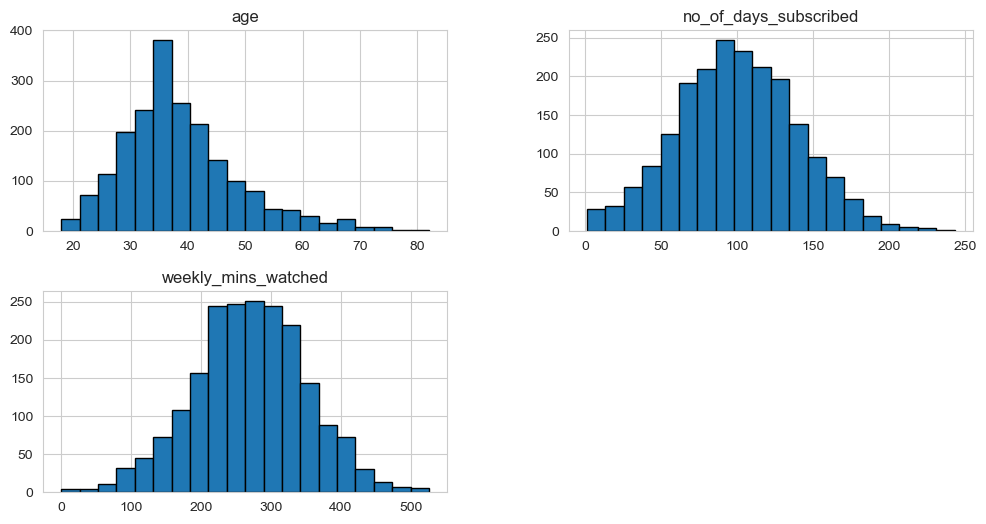

In [20]:
# Plot histograms for numerical columns
df[['age', 'no_of_days_subscribed', 'weekly_mins_watched']].hist(figsize=(12, 6), bins=20, edgecolor='black')
plt.show()


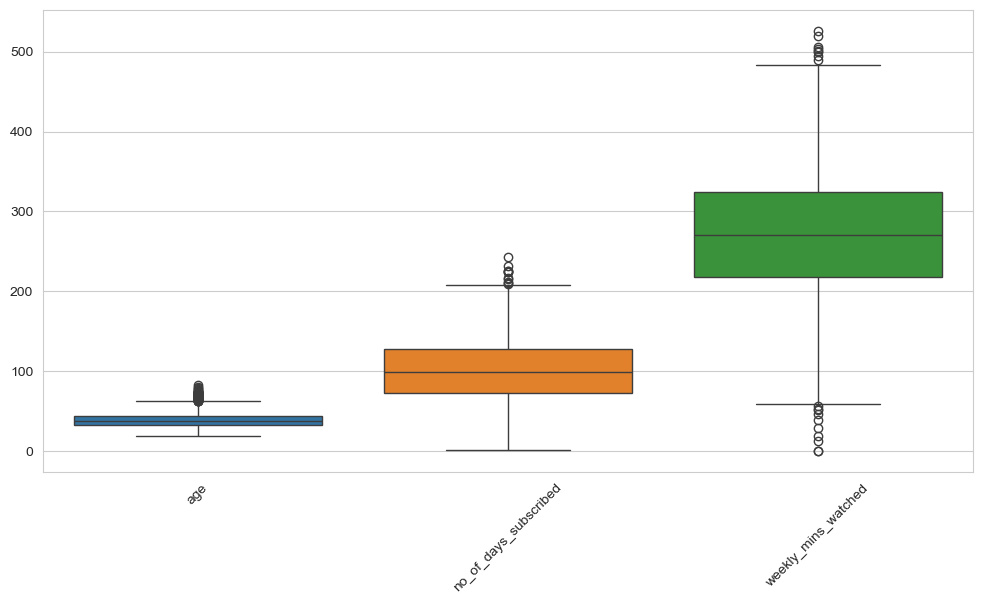

In [22]:
#to detect outliers in these columns
# Boxplot for numerical features
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['age', 'no_of_days_subscribed', 'weekly_mins_watched']])
plt.xticks(rotation=45)
plt.show()


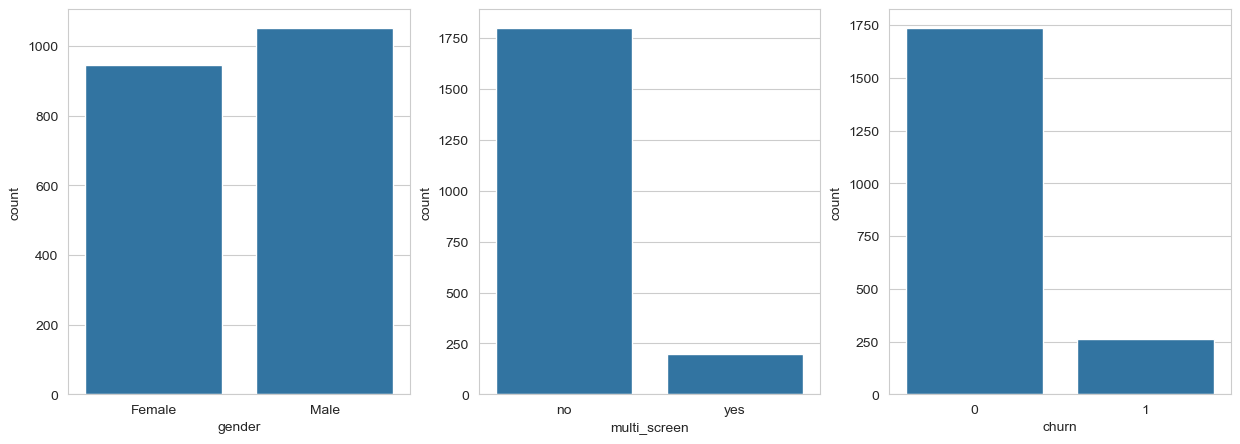

In [24]:
#To analyse categorical column distribution
# Count plots for categorical columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x=df["gender"], ax=axes[0])
sns.countplot(x=df["multi_screen"], ax=axes[1])
sns.countplot(x=df["churn"], ax=axes[2])

plt.show()


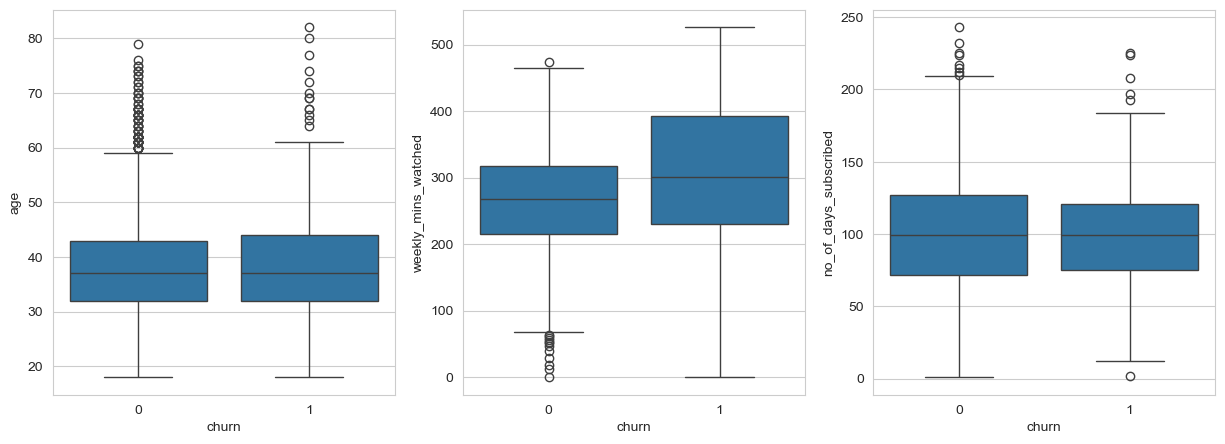

In [26]:
# Bivariate analysis(feature relationship with churn)
# Boxplot for numerical variables vs Churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df["churn"], y=df["age"], ax=axes[0])
sns.boxplot(x=df["churn"], y=df["weekly_mins_watched"], ax=axes[1])
sns.boxplot(x=df["churn"], y=df["no_of_days_subscribed"], ax=axes[2])

plt.show()


In [32]:
# Convert categorical columns to numerical values
df_encoded = df.copy()

# Encoding gender: Male = 1, Female = 0
df_encoded["gender"] = df_encoded["gender"].map({"Male": 1, "Female": 0})

# Encoding multi_screen and mail_subscribed: 'yes' = 1, 'no' = 0
df_encoded["multi_screen"] = df_encoded["multi_screen"].map({"yes": 1, "no": 0})
df_encoded["mail_subscribed"] = df_encoded["mail_subscribed"].map({"yes": 1, "no": 0})

# Ensure all data is numeric before correlation
df_encoded = df_encoded.apply(pd.to_numeric, errors="coerce")

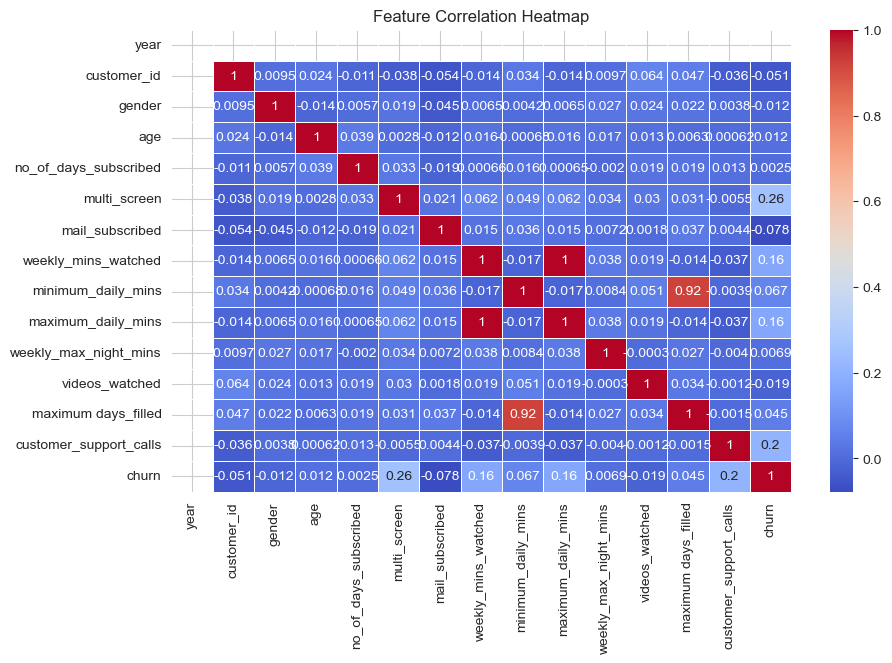

In [34]:
# Now generate the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

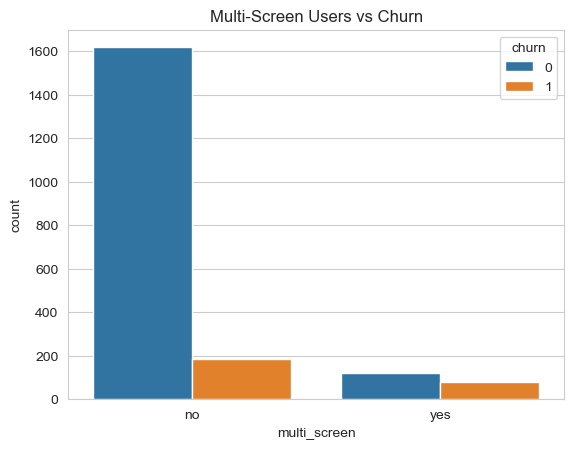

In [36]:
#customer segmentation and retention insights
sns.countplot(x=df["multi_screen"], hue=df["churn"])
plt.title("Multi-Screen Users vs Churn")
plt.show()


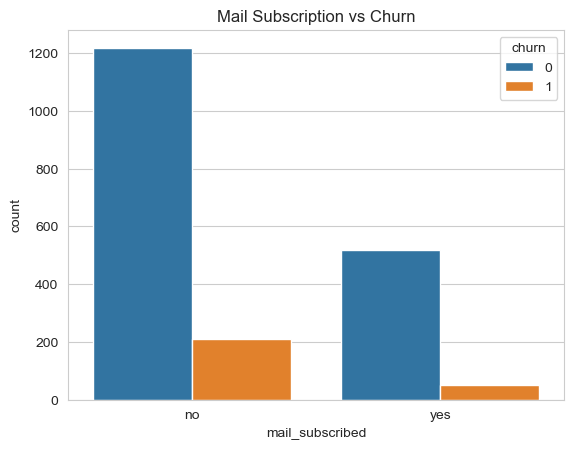

In [38]:
#customer_segmentation and retention insights
sns.countplot(x=df["mail_subscribed"], hue=df["churn"])
plt.title("Mail Subscription vs Churn")
plt.show()

